# Question 1
(a) Draw 1000 samples from a normal distribution $\mathcal{N}(0, 1)$. Denote these samples $ X $.

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

X = np.random.normal(0, 1, 1000)

(b) You suspect a third party replaced some of your samples with samples drawn from a different normal distribution **with $\mu>0$**. Could you use statistical hypothesis testing to check? What would be the null hypothesis?

_hint:_ there are multiple (literally infinite) possible null hypotheses. which would you choose if you would want to avoid "crying wolf" i.e. a false positive?

Answer : Null hypothesis - for each sample my sample is from the 0-mean normal distribution. rejction would be if point is at lower p-value than that required by alpha

(c) Perform hypothesis testing for $ \alpha=0.01, 0.05, 0.1, 0.2, 0.3 $. What is the proportion of rejected null hypothesis for each? Plot your results

alphas = [.01,.05,.1,.2,.3]

In [1]:
def hypothesis_test(x, y, alphas):
    std = x.std()
    stdevs = [norm.ppf(1-alpha) for alpha in alphas]
    results = []
    for item in stdevs:
        failed = 0
        for y_item in y:
            if y_item > x.mean() + std*item:
                failed += 1
        results.append(failed/len(y))
    
    return results


   

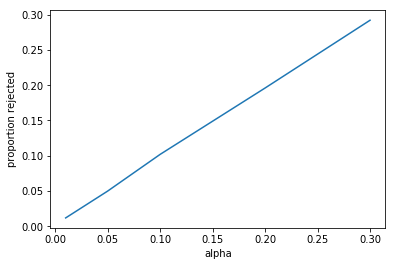

In [3]:
alphas = [.01,.05,.1,.2,.3]
ratio_1 = hypothesis_test(X,X,alphas)
plt.figure()
plt.plot(alphas, ratio_1)
plt.xlabel("alpha")
plt.ylabel("proportion rejected")
plt.show()

(d) For $\mu=1$ draw 1000 samples from a normal distribution $ \mathcal{N}(\mu, 1) $. Denote these samples $ Y $. 

In [4]:
Y = np.random.normal(1, 1, 1000)

    

(e) For the $ \alpha $ values in (c) peform the **same** testing on $ Y $ (same null hypothesis). Plot the ratio$^1$ of null hypotheses rejected in $ Y $ (as the y axis) to the number of elements in $ Y $ against the ratio$^2$ of null hypotheses rejected in $ X $ to the number of elements in $ X $ (as the x axis).

- what is ratio$^1$?
- what is ratio$^2$?

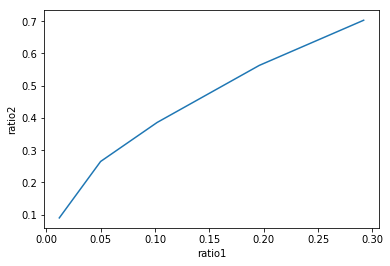

In [5]:
ratio_2 = hypothesis_test(X, Y, alphas)
plt.plot(ratio_1, ratio_2)
plt.xlabel("ratio1")
plt.ylabel("ratio2")
plt.show()

ratio1 is the fraction of points wrongly rejected when the null hypothesis was correct (type 1 error rate, false positive rate)
ratio2 was the fraction of points correctly rejected when the null hypothesis was wrong(1-type 2 error rate, true positive rate)


A plot of false positive rate Vs. true positive rate (in binary classification) is known as a ROC curve. 
A ROC curve shows the balance between the two rates for a given model, enabling an informed choice. 

(f) Repeat question (d) and (e) for $ \mu=0.1, 0.3, 0.5, 1.5 $. Plot ROC curves for all options. 


Explain the difference in the curves: 
- Is the problem harder for some $ \mu $ values? 
- How is that visible from the curves?
- For a single curve, how would you choose an optimal $ \alpha $ value?

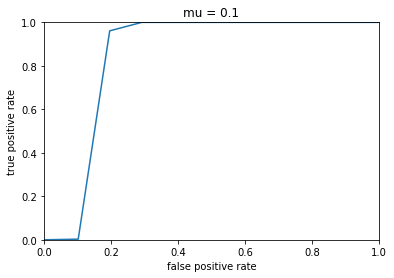

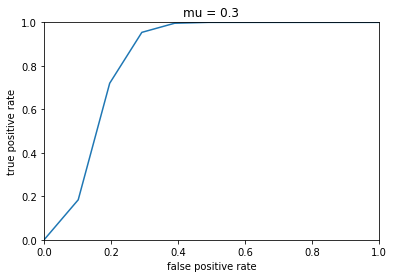

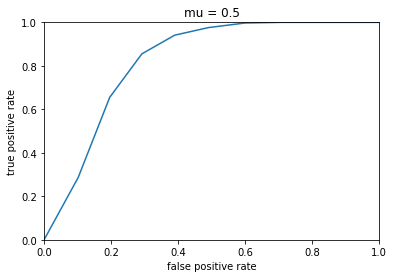

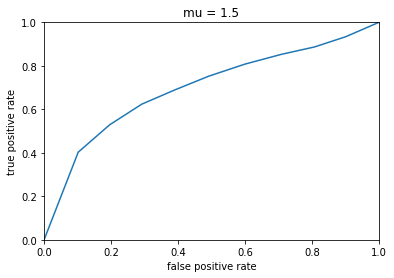

In [6]:
# code and plots go here

alphas = np.linspace(0,1,11)
ratio_1 = hypothesis_test(X,X,alphas)
mu_list = [0.1, .3,.5,1.5]
for mu in mu_list:
    Y = np.random.normal(1, mu, 1000)
    ratio_2 = hypothesis_test(X, Y, alphas)
    plt.plot(ratio_1, ratio_2)
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title(f"mu = {mu}")
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.show()


for sample mu close to those of X (the population), it becomes harder to find true positives, so the predictive value of the classifier becomes less informative

# Question 2
$$
\begin{aligned}
&X=\left\{X_i\right\}_{i=1}^{1000},\:\: X_i \sim \mathcal{N}(0, 1)\\
&Y=\left\{Y_i\right\}_{i=1}^{1000},\:\: Y_i \sim \mathcal{N}(1, 1)\\
&\alpha = 0.01, 0.05, 0.1, 0.2, 0.3
\end{aligned}
$$

(a) Again you suspect You suspect a third party replaced some of your samples with samples drawn from a different normal distribution with  μ>0. Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [33]:
alphas = [0.05]
false_rejections = 0
repetitions = 2000
for counter in range(repetitions):
    X = np.random.normal(0, 1, 1000)
    if hypothesis_test(X,X,alphas)[0] > 0:
        false_rejections += 1
        

In [34]:
print(f"there were false rejections (false positives) in {false_rejections*100/repetitions}% of cases")

there were false rejections (false positives) in 100.0% of cases


(b) Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $ and apply the Bonferroni correction. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [35]:
alphas[0] = alphas[0] / len(X)
false_rejections = 0
repetitions = 2000
for counter in range(repetitions):
    X = np.random.normal(0, 1, 1000)
    if hypothesis_test(X,X,alphas)[0] > 0:
        false_rejections += 1
print(f"Using Bonferroni correction, there were false rejections (false positives) in {false_rejections*100/repetitions}% of cases")

Using Bonferroni correction, there were false rejections (false positives) in 5.4% of cases


(c) For all $ \alpha $ values peform testing on $ X $ and $ Y $, with and without using the Bonferroni correction. Repeat the process 2000 times and average results. Plot the ROC curves on the separate plots. 

hint: what is $ m $, the number of experiments?

In [30]:
from tqdm import tqdm
alphas = np.linspace(0,.9,10) 
repetitions = 2000
alphas_b = [alpha/repetitions for alpha in alphas]
ratio1 = []
ratio2 = []
ratio1b = []
ratio2b = []

for rep in tqdm(range(repetitions)):
       
    X = np.random.normal(0, 1, 1000)
    Y = np.random.normal(1, 1, 1000)
    ratio1.append(hypothesis_test(X, X, alphas))
    ratio2.append(hypothesis_test(X,Y,alphas))
    ratio1b.append(hypothesis_test(X, X, alphas_b))
    ratio2b.append(hypothesis_test(X,Y,alphas_b))
    ratio1df = pd.DataFrame(ratio1)
    ratio2df = pd.DataFrame(ratio2)
    ratio1bdf = pd.DataFrame(ratio1b)
    ratio2bdf = pd.DataFrame(ratio2b)

ratio1 = ratio1df.mean()
ratio2 = ratio2df.mean()
ratio1b = ratio1bdf.mean()
ratio2b = ratio2bdf.mean()

plt.plot(ratio1, ratio2)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

plt.plot(ratio1b, ratio2b)
plt.title('ROC with Bonferroni correction')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


   



  2%|▏         | 46/2000 [01:13<52:57,  1.63s/it]

KeyboardInterrupt: 

under Bonferroni you don't get enough false positives to actually see the ROC

# Question 3

$$
\begin{aligned}
&X=\left\{X_i\right\}_{i=1}^{1000},\:\: X_i \sim \mathcal{N}(0, 1)\\
&Y=\left\{Y_i\right\}_{i=1}^{1000},\:\: Y_i \sim \mathcal{N}(1, 1)\\
\end{aligned}
$$

(a) Use the given implementation of the Benjamini-Hochberg (BH) procedure. For $ \alpha = 0.05 $ compute the FDR with and without the BH procedure. Repeat 2000 times. What is the FDR with and without correction? What is the average number of true detections?

Bonus: what are these values for the Bonferroni correction?

In [8]:
def BH_procedure(X, Y, alpha=0.05):
    '''
    receive two row vectors X and Y and a significance level alpha. 
    null hypotheses is that all samples are drawn from N(0, 1).
    X is assumed to be sampled from H0 and Y sampled from H1 (mu>0)
    
    :param X: numpy row vector
    :param Y: numpy row vector
    
    :returns discovery_count: number of rejected null hypotheses
    :returns false_discovery_count: number of rejected null hypotheses
    ''' 
    
    pvals = 1 - norm.cdf(np.hstack((X, Y)))
    sort_inds = np.argsort(pvals)[::-1]
    
    m = X.size + Y.size
    
    for ind, sort_ind in enumerate(sort_inds):
        if pvals[sort_ind] <= float(m - ind)/(m) * alpha:
            break
            
    discovery_count = m - ind
    false_discovery_count = np.sum(sort_inds[ind:] < X.size - 1)
    
    return discovery_count, false_discovery_count

In [21]:
def FDR(X,Y, alpha):
    std_X = X.std()
    std_Y = Y.std()
    mean_X = X.mean()
    mean_Y = Y.mean()
    number_of_standard_deviations = norm.ppf(1-alpha)
    false_detections = 0
    true_detections = 0
    for x in X:
        if x > mean_X + number_of_standard_deviations * std_X:
            false_detections += 1
    for y in Y:
        if y > mean_X + number_of_standard_deviations * std_X:
            true_detections += 1
    
    
    if false_detections + true_detections > 0:
        return false_detections/(false_detections + true_detections)  
    return 0

In [23]:
alphas = np.linspace(0,.9,10) 
repetitions = 2000

# ratio1 = []
# ratio2 = []
# ratio1b = []
# ratio2b = []
alpha = 0.05
fdr_bh = 0
fdr = 0
fdr_bonferroni = 0
for rep in range(repetitions):
      
    X = np.random.normal(0, 1, 1000)
    Y = np.random.normal(1, 1, 1000)
    BH = BH_procedure(X, Y, alpha)
    fdr_bh += BH[1]/BH[0]
    fdr += FDR(X, Y, alpha)
    fdr_bonferroni += FDR(X, Y, alpha/(len(X) + len(Y)))
fdr_bh /= repetitions
fdr /= repetitions
fdr_bonferroni /= repetitions
print(f"FDR with BH is {round(fdr_bh,2)}, with Bonferroni is {round(fdr_bonferroni,2)}, and without a correction is {round(fdr,2)}")


      
     
    


FDR with BH is 0.03, with Bonferroni is 0.01, and without a correction is 0.16


(b) Repeat Question 2 (c) with the BH procedure correction instead of Bonferroni.

Bonus: compare against result for Bonferroni

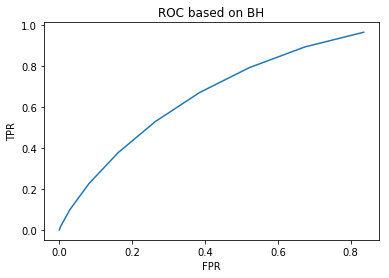

In [27]:
alphas = np.linspace(0,.9,10) 
repetitions = 2000
TPRs = []
FPRs = []
alpha_dict = {}
for alpha in alphas:
    total_FPR = 0
    total_TPR = 0
    for rep in range(repetitions):

        X = np.random.normal(0, 1, 1000)
        Y = np.random.normal(1, 1, 1000)
        all_positives_count, false_positives_count = BH_procedure(X, Y, alpha) 
        FPR = FDR(X, Y, alpha)*all_positives_count/len(X)
        TPR = (all_positives_count - false_positives_count)/len(Y)
        total_FPR += FPR
        total_TPR += TPR
    TPRs.append(total_TPR/repetitions)
    FPRs.append(total_FPR/repetitions)
    
ROC = {'alpha':alphas,
      'FPR':FPRs,
      'TPR':TPRs}

plt.plot(ROC['FPR'], ROC['TPR'])
plt.title('ROC based on BH')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()
